In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv("DS1_C9_S7_Project_AbsenteeismAtWork_Data.csv",delimiter=';')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [9]:
#Outlier Treatment- winsorization
def iqr_winsorization(df, threshold=1.5):
    df_out= df.copy() 
    columns_to_treat= df_out.columns
    for col in columns_to_treat: 
        q1=df_out[col].quantile(0.25) 
        q3=df_out [col].quantile(0.75) 
        iqr=q3-q1
        lf=q1-threshold*iqr 
        uf=q3+threshold*iqr
        df_out.loc[df_out [col]<lf, col]=lf
        df_out.loc [df_out [col] >uf, col]=uf
    return df_out

df=iqr_winsorization(df)

In [11]:
data=df.copy()
remove=['ID','Social drinker','Social smoker',"Education"]
data.drop(remove,axis=1,inplace=True)
data

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26.0,7,3,1,289.0,36,13.0,33.0,239.554,97,0,2,1.0,90,172.0,30.0,4
1,0.0,7,3,1,118.0,13,18.0,50.0,239.554,97,0,1,0.0,98,176.5,31.0,0
2,23.0,7,4,1,179.0,51,18.0,38.0,239.554,97,0,0,0.0,89,170.0,31.0,2
3,7.0,7,5,1,279.0,5,14.0,39.0,239.554,97,0,2,0.0,68,168.0,24.0,4
4,23.0,7,5,1,289.0,36,13.0,33.0,239.554,97,0,2,1.0,90,172.0,30.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14.0,7,3,1,289.0,36,13.0,33.0,264.604,93,0,2,1.0,90,172.0,30.0,8
736,11.0,7,3,1,235.0,11,14.0,37.0,264.604,93,0,1,1.0,88,172.0,29.0,4
737,0.0,0,3,1,118.0,14,13.0,40.0,271.219,95,0,1,2.5,98,170.0,34.0,0
738,0.0,0,4,2,231.0,35,14.0,39.0,271.219,95,0,2,2.0,100,170.0,35.0,0


In [13]:
cols= data.columns
scaler= StandardScaler()
scaled= scaler.fit_transform(data)
df_scaled= pd.DataFrame(scaled, columns=cols)
df_scaled

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0.804938,0.196763,-0.643947,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.830594,0.681528,0.0,0.893723,0.465851,0.851673,0.333508,0.775932,-0.233397
1,-2.280124,0.196763,-0.643947,-1.390175,-1.545473,-1.121694,1.263697,2.149126,-0.830594,0.681528,0.0,-0.017234,-0.702725,1.473056,1.862181,1.009438,-1.123676
2,0.448970,0.196763,0.059924,-1.390175,-0.632881,1.441240,1.263697,0.252650,-0.830594,0.681528,0.0,-0.928191,-0.702725,0.774000,-0.345902,1.009438,-0.678537
3,-1.449530,0.196763,0.763796,-1.390175,0.863172,-1.661258,0.338393,0.410690,-0.830594,0.681528,0.0,0.893723,-0.702725,-0.857131,-1.025313,-0.625100,-0.233397
4,0.448970,0.196763,0.763796,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.830594,0.681528,0.0,0.893723,0.465851,0.851673,0.333508,0.775932,-0.678537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,-0.618937,0.196763,-0.643947,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.170828,-0.525727,0.0,0.893723,0.465851,0.851673,0.333508,0.775932,0.656881
736,-0.974905,0.196763,-0.643947,-1.390175,0.204909,-1.256585,0.338393,0.094610,-0.170828,-0.525727,0.0,-0.017234,0.465851,0.696327,0.333508,0.542427,-0.233397
737,-2.280124,-1.841698,-0.643947,-1.390175,-1.545473,-1.054248,0.107066,0.568729,0.003397,0.077901,0.0,-0.017234,2.218715,1.473056,-0.345902,1.709954,-1.123676
738,-2.280124,-1.841698,0.059924,-0.490149,0.145067,0.362110,0.338393,0.410690,0.003397,0.077901,0.0,0.893723,1.634427,1.628402,-0.345902,1.943459,-1.123676


In [17]:
ss=df[['Social drinker','Social smoker']]
df_scaled=pd.concat([df_scaled,ss],axis=1)
df_scaled

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,...,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Social drinker,Social smoker,Social drinker,Social smoker
0,0.804938,0.196763,-0.643947,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.830594,0.681528,...,0.893723,0.465851,0.851673,0.333508,0.775932,-0.233397,1.0,0,1.0,0
1,-2.280124,0.196763,-0.643947,-1.390175,-1.545473,-1.121694,1.263697,2.149126,-0.830594,0.681528,...,-0.017234,-0.702725,1.473056,1.862181,1.009438,-1.123676,1.0,0,1.0,0
2,0.448970,0.196763,0.059924,-1.390175,-0.632881,1.441240,1.263697,0.252650,-0.830594,0.681528,...,-0.928191,-0.702725,0.774000,-0.345902,1.009438,-0.678537,1.0,0,1.0,0
3,-1.449530,0.196763,0.763796,-1.390175,0.863172,-1.661258,0.338393,0.410690,-0.830594,0.681528,...,0.893723,-0.702725,-0.857131,-1.025313,-0.625100,-0.233397,1.0,0,1.0,0
4,0.448970,0.196763,0.763796,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.830594,0.681528,...,0.893723,0.465851,0.851673,0.333508,0.775932,-0.678537,1.0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,-0.618937,0.196763,-0.643947,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.170828,-0.525727,...,0.893723,0.465851,0.851673,0.333508,0.775932,0.656881,1.0,0,1.0,0
736,-0.974905,0.196763,-0.643947,-1.390175,0.204909,-1.256585,0.338393,0.094610,-0.170828,-0.525727,...,-0.017234,0.465851,0.696327,0.333508,0.542427,-0.233397,0.0,0,0.0,0
737,-2.280124,-1.841698,-0.643947,-1.390175,-1.545473,-1.054248,0.107066,0.568729,0.003397,0.077901,...,-0.017234,2.218715,1.473056,-0.345902,1.709954,-1.123676,1.0,0,1.0,0
738,-2.280124,-1.841698,0.059924,-0.490149,0.145067,0.362110,0.338393,0.410690,0.003397,0.077901,...,0.893723,1.634427,1.628402,-0.345902,1.943459,-1.123676,1.0,0,1.0,0


In [22]:
# Extract the last row index
last_row= len(df_scaled)-1

# Extract the last row using iloc and store in a new DataFrame
validation= df_scaled.iloc[last_row]
validation
# Reshape the extracted Series into a DataFrame (optional)
new_data_df= validation.to_frame().transpose()
new_data_df

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,...,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Social drinker,Social smoker,Social drinker,Social smoker
739,-2.280124,-1.841698,1.467667,0.409877,-0.632881,1.036566,0.338393,2.623245,0.003397,0.077901,...,-0.017234,0.465851,-0.158075,1.352623,-0.391595,-1.123676,0.0,0.0,0.0,0.0


In [24]:
#Extract original data except the new data
# Retrieve original data by excluding new data
df_scaled= df_scaled.iloc[:-1]
df_scaled

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,...,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Social drinker,Social smoker,Social drinker,Social smoker
0,0.804938,0.196763,-0.643947,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.830594,0.681528,...,0.893723,0.465851,0.851673,0.333508,0.775932,-0.233397,1.0,0,1.0,0
1,-2.280124,0.196763,-0.643947,-1.390175,-1.545473,-1.121694,1.263697,2.149126,-0.830594,0.681528,...,-0.017234,-0.702725,1.473056,1.862181,1.009438,-1.123676,1.0,0,1.0,0
2,0.448970,0.196763,0.059924,-1.390175,-0.632881,1.441240,1.263697,0.252650,-0.830594,0.681528,...,-0.928191,-0.702725,0.774000,-0.345902,1.009438,-0.678537,1.0,0,1.0,0
3,-1.449530,0.196763,0.763796,-1.390175,0.863172,-1.661258,0.338393,0.410690,-0.830594,0.681528,...,0.893723,-0.702725,-0.857131,-1.025313,-0.625100,-0.233397,1.0,0,1.0,0
4,0.448970,0.196763,0.763796,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.830594,0.681528,...,0.893723,0.465851,0.851673,0.333508,0.775932,-0.678537,1.0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,-0.737593,0.196763,-1.347819,-1.390175,2.209619,-0.851911,-0.124260,-0.853628,-0.170828,-0.525727,...,1.804680,-0.702725,-0.701785,-0.685607,-0.391595,2.660009,1.0,0,1.0,0
735,-0.618937,0.196763,-0.643947,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.170828,-0.525727,...,0.893723,0.465851,0.851673,0.333508,0.775932,0.656881,1.0,0,1.0,0
736,-0.974905,0.196763,-0.643947,-1.390175,0.204909,-1.256585,0.338393,0.094610,-0.170828,-0.525727,...,-0.017234,0.465851,0.696327,0.333508,0.542427,-0.233397,0.0,0,0.0,0
737,-2.280124,-1.841698,-0.643947,-1.390175,-1.545473,-1.054248,0.107066,0.568729,0.003397,0.077901,...,-0.017234,2.218715,1.473056,-0.345902,1.709954,-1.123676,1.0,0,1.0,0


In [26]:
abs(df_scaled.corr())>.7


,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,...,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Social drinker,Social smoker,Social drinker,Social smoker
Reason for absence,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Month of absence,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Day of the week,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Seasons,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Transportation expense,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Distance from Residence to Work,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Service time,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Age,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Work load Average/day,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Hit target,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

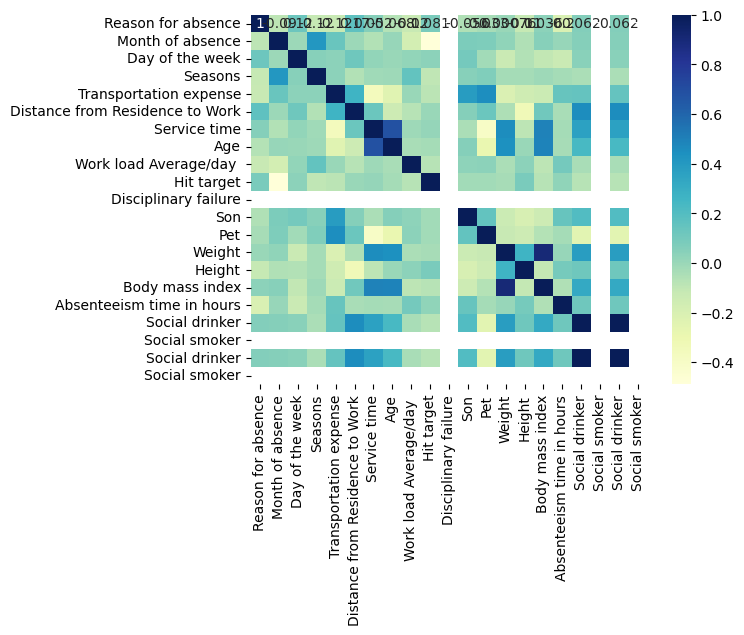

In [28]:
# Plotting heatmap
sns.heatmap(df_scaled.corr(), annot=True, cmap='YlGnBu')

In [29]:
a=['Social smoker']
df_scaled.drop(a,axis=1,inplace=True)
df_scaled

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Social drinker,Social drinker
0,0.804938,0.196763,-0.643947,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.830594,0.681528,0.0,0.893723,0.465851,0.851673,0.333508,0.775932,-0.233397,1.0,1.0
1,-2.280124,0.196763,-0.643947,-1.390175,-1.545473,-1.121694,1.263697,2.149126,-0.830594,0.681528,0.0,-0.017234,-0.702725,1.473056,1.862181,1.009438,-1.123676,1.0,1.0
2,0.448970,0.196763,0.059924,-1.390175,-0.632881,1.441240,1.263697,0.252650,-0.830594,0.681528,0.0,-0.928191,-0.702725,0.774000,-0.345902,1.009438,-0.678537,1.0,1.0
3,-1.449530,0.196763,0.763796,-1.390175,0.863172,-1.661258,0.338393,0.410690,-0.830594,0.681528,0.0,0.893723,-0.702725,-0.857131,-1.025313,-0.625100,-0.233397,1.0,1.0
4,0.448970,0.196763,0.763796,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.830594,0.681528,0.0,0.893723,0.465851,0.851673,0.333508,0.775932,-0.678537,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,-0.737593,0.196763,-1.347819,-1.390175,2.209619,-0.851911,-0.124260,-0.853628,-0.170828,-0.525727,0.0,1.804680,-0.702725,-0.701785,-0.685607,-0.391595,2.660009,1.0,1.0
735,-0.618937,0.196763,-0.643947,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.170828,-0.525727,0.0,0.893723,0.465851,0.851673,0.333508,0.775932,0.656881,1.0,1.0
736,-0.974905,0.196763,-0.643947,-1.390175,0.204909,-1.256585,0.338393,0.094610,-0.170828,-0.525727,0.0,-0.017234,0.465851,0.696327,0.333508,0.542427,-0.233397,0.0,0.0
737,-2.280124,-1.841698,-0.643947,-1.390175,-1.545473,-1.054248,0.107066,0.568729,0.003397,0.077901,0.0,-0.017234,2.218715,1.473056,-0.345902,1.709954,-1.123676,1.0,1.0


In [30]:
"""
Project-2
Task 1: Identifying Employees at Risk of - Absenteeism
Can we identify employees who are more likely to have high absenteeism using factors like demographics, work characteristics, and past absence data?
Build Logistic Regression and KNN models to classify employees who are more likely to have high absenteeism using factors like demographics, 
work characteristics, and past absence data. Further compare them to choose the best classifier model to identify employees who likely to have 
high absenteeism.
"""

'\nProject-2\nTask 1: Identifying Employees at Risk of - Absenteeism\nCan we identify employees who are more likely to have high absenteeism using factors like demographics, work characteristics, and past absence data?\nBuild Logistic Regression and KNN models to classify employees who are more likely to have high absenteeism using factors like demographics, \nwork characteristics, and past absence data. Further compare them to choose the best classifier model to identify employees who likely to have \nhigh absenteeism.\n'

In [32]:
df['Absenteeism time in hours_'] = df['Absenteeism time in hours'].apply(lambda x: 1 if x > 8 else 0)


In [36]:
df['Absenteeism time in hours_'].value_counts()

Absenteeism time in hours_
0    677
1     63
Name: count, dtype: int64

In [38]:
abs(df_scaled.corr())

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Social drinker,Social drinker
Reason for absence,1.000000,0.090064,0.121452,0.117087,0.121197,0.165733,0.051901,0.068022,0.122320,0.080972,NaN,0.055613,0.033484,0.000760,0.113692,0.036128,0.204350,0.062180,0.062180
Month of absence,0.090064,1.000000,0.002881,0.409779,0.136813,0.001308,0.064254,0.006312,0.172499,0.489564,NaN,0.079170,0.074542,0.022937,0.054087,0.050191,0.005830,0.053542,0.053542
Day of the week,0.121452,0.002881,1.000000,0.045751,0.035593,0.116221,0.020117,0.002969,0.017791,0.039732,NaN,0.098256,0.023321,0.128856,0.062584,0.102961,0.129734,0.044151,0.044151
Seasons,0.117087,0.409779,0.045751,1.000000,0.037471,0.063737,0.012844,0.010104,0.151449,0.094755,NaN,0.046965,0.067491,0.026193,0.025927,0.010816,0.028262,0.045392,0.045392
Transportation expense,0.121197,0.136813,0.035593,0.037471,1.000000,0.263976,0.358473,0.233569,0.003043,0.082907,NaN,0.383825,0.452121,0.207737,0.152803,0.136788,0.140421,0.144896,0.144896
Distance from Residence to Work,0.165733,0.001308,0.116221,0.063737,0.263976,1.000000,0.128316,0.145632,0.070689,0.002245,NaN,0.054294,0.128510,0.047673,0.335767,0.114416,0.036329,0.454537,0.454537
Service time,0.051901,0.064254,0.020117,0.012844,0.358473,0.128316,1.000000,0.684060,0.007312,0.015212,NaN,0.044140,0.396667,0.453523,0.089594,0.498302,0.029210,0.363313,0.363313
Age,0.068022,0.006312,0.002969,0.010104,0.233569,0.145632,0.684060,1.000000,0.039193,0.026172,NaN,0.051738,0.289328,0.439451,0.003058,0.493755,0.030855,0.232295,0.232295
Work load Average/day,0.122320,0.172499,0.017791,0.151449,0.003043,0.070689,0.007312,0.039193,1.000000,0.071211,NaN,0.029852,0.034246,0.042664,0.037206,0.093619,0.098259,0.037854,0.037854
Hit target,0.080972,0.489564,0.039732,0.094755,0.082907,0.002245,0.015212,0.026172,0.071211,1.000000,NaN,0.023549,0.021567,0.031197,0.085794,0.072698,0.023040,0.076177,0.076177


<Axes: >

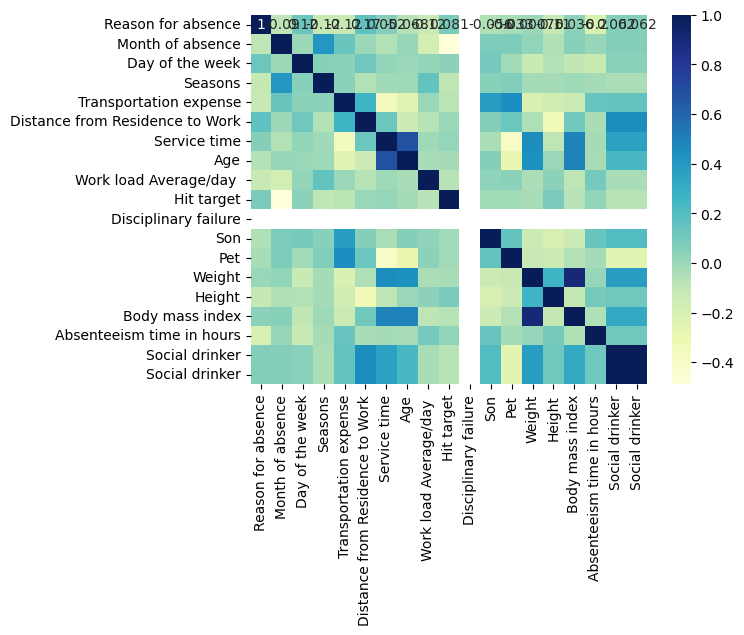

In [40]:
sns.heatmap(df_scaled.corr(), annot=True, cmap='YlGnBu')

In [41]:
a=df['Absenteeism time in hours_']
df_scaled=pd.concat([df_scaled,a],axis=1)
df_scaled

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Social drinker,Social drinker,Absenteeism time in hours_
0,0.804938,0.196763,-0.643947,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.830594,0.681528,0.0,0.893723,0.465851,0.851673,0.333508,0.775932,-0.233397,1.0,1.0,0
1,-2.280124,0.196763,-0.643947,-1.390175,-1.545473,-1.121694,1.263697,2.149126,-0.830594,0.681528,0.0,-0.017234,-0.702725,1.473056,1.862181,1.009438,-1.123676,1.0,1.0,0
2,0.448970,0.196763,0.059924,-1.390175,-0.632881,1.441240,1.263697,0.252650,-0.830594,0.681528,0.0,-0.928191,-0.702725,0.774000,-0.345902,1.009438,-0.678537,1.0,1.0,0
3,-1.449530,0.196763,0.763796,-1.390175,0.863172,-1.661258,0.338393,0.410690,-0.830594,0.681528,0.0,0.893723,-0.702725,-0.857131,-1.025313,-0.625100,-0.233397,1.0,1.0,0
4,0.448970,0.196763,0.763796,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.830594,0.681528,0.0,0.893723,0.465851,0.851673,0.333508,0.775932,-0.678537,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,-0.618937,0.196763,-0.643947,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.170828,-0.525727,0.0,0.893723,0.465851,0.851673,0.333508,0.775932,0.656881,1.0,1.0,0
736,-0.974905,0.196763,-0.643947,-1.390175,0.204909,-1.256585,0.338393,0.094610,-0.170828,-0.525727,0.0,-0.017234,0.465851,0.696327,0.333508,0.542427,-0.233397,0.0,0.0,0
737,-2.280124,-1.841698,-0.643947,-1.390175,-1.545473,-1.054248,0.107066,0.568729,0.003397,0.077901,0.0,-0.017234,2.218715,1.473056,-0.345902,1.709954,-1.123676,1.0,1.0,0
738,-2.280124,-1.841698,0.059924,-0.490149,0.145067,0.362110,0.338393,0.410690,0.003397,0.077901,0.0,0.893723,1.634427,1.628402,-0.345902,1.943459,-1.123676,1.0,1.0,0


In [42]:
df_scaled.drop('Absenteeism time in hours',axis=1,inplace=True)

In [46]:
df_scaled= df_scaled.iloc[:-1]
df_scaled

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Pet,Weight,Height,Body mass index,Social drinker,Social drinker,Absenteeism time in hours_
0,0.804938,0.196763,-0.643947,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.830594,0.681528,0.0,0.893723,0.465851,0.851673,0.333508,0.775932,1.0,1.0,0
1,-2.280124,0.196763,-0.643947,-1.390175,-1.545473,-1.121694,1.263697,2.149126,-0.830594,0.681528,0.0,-0.017234,-0.702725,1.473056,1.862181,1.009438,1.0,1.0,0
2,0.448970,0.196763,0.059924,-1.390175,-0.632881,1.441240,1.263697,0.252650,-0.830594,0.681528,0.0,-0.928191,-0.702725,0.774000,-0.345902,1.009438,1.0,1.0,0
3,-1.449530,0.196763,0.763796,-1.390175,0.863172,-1.661258,0.338393,0.410690,-0.830594,0.681528,0.0,0.893723,-0.702725,-0.857131,-1.025313,-0.625100,1.0,1.0,0
4,0.448970,0.196763,0.763796,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.830594,0.681528,0.0,0.893723,0.465851,0.851673,0.333508,0.775932,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,-0.737593,0.196763,-1.347819,-1.390175,2.209619,-0.851911,-0.124260,-0.853628,-0.170828,-0.525727,0.0,1.804680,-0.702725,-0.701785,-0.685607,-0.391595,1.0,1.0,1
735,-0.618937,0.196763,-0.643947,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.170828,-0.525727,0.0,0.893723,0.465851,0.851673,0.333508,0.775932,1.0,1.0,0
736,-0.974905,0.196763,-0.643947,-1.390175,0.204909,-1.256585,0.338393,0.094610,-0.170828,-0.525727,0.0,-0.017234,0.465851,0.696327,0.333508,0.542427,0.0,0.0,0
737,-2.280124,-1.841698,-0.643947,-1.390175,-1.545473,-1.054248,0.107066,0.568729,0.003397,0.077901,0.0,-0.017234,2.218715,1.473056,-0.345902,1.709954,1.0,1.0,0


In [48]:
X=df_scaled.drop('Absenteeism time in hours_', axis=1).values
y= df_scaled['Absenteeism time in hours_'].values

In [50]:
df_scaled.shape

(739, 19)

In [52]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size= 0.3, random_state=0)
X_train.shape

(517, 18)

In [54]:
X_test.shape

(222, 18)

In [56]:
#Logistic Regression training the model 


logreg= LogisticRegression() 
logreg.fit(X_train, y_train)

#Using the trained model to predict the outcome of the X_Test dataset 
y_pred=logreg.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       204
           1       0.67      0.11      0.19        18

    accuracy                           0.92       222
   macro avg       0.80      0.55      0.58       222
weighted avg       0.91      0.92      0.90       222



In [60]:
# ROC Score
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test, logreg.predict_proba(X_test) [:,1])
print(f"roc_score:{roc}")


roc_score:0.7374727668845314


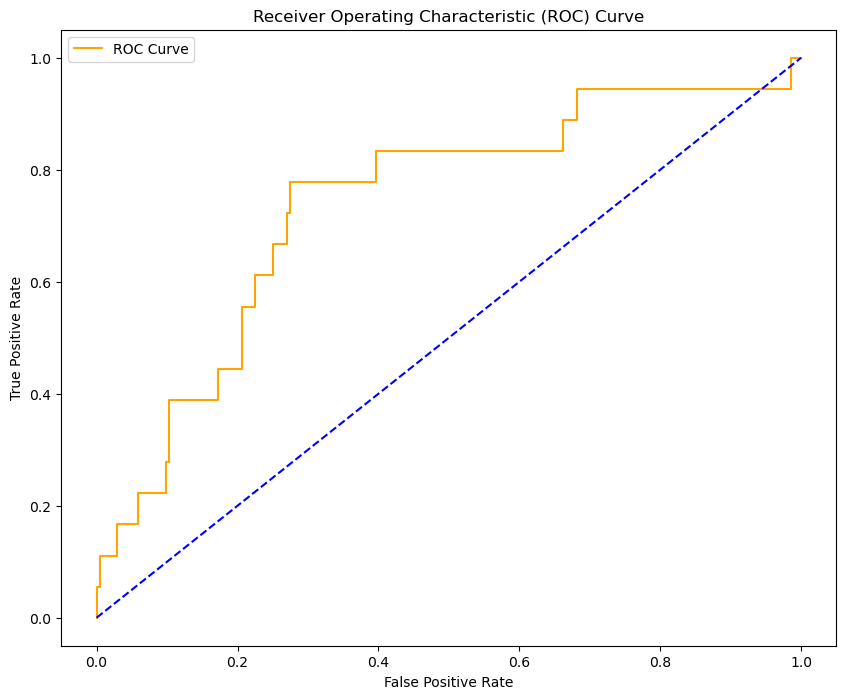

In [62]:
# ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predicting probabilities for the positive class
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plotting the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='orange', label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

Interpretation:
                  The model excels at identifying employees not at risk of absenteeism with high precision (0.93) and perfect recall (1.00), ensuring efficient resource allocation. With an overall accuracy of 92%, it provides a reliable basis for initial assessments in managing absenteeism. The ROC score of 0.741 indicates a fair ability to distinguish between different risk levels.





In [65]:
import numpy as np
# set range between 1 to 8
from sklearn import neighbors
error_rate= []
for i in range(1,8):
    clf_food=neighbors.KNeighborsClassifier(n_neighbors=i)
    clf_food.fit(X_train, y_train) 
    pred_i= clf_food.predict(X_test)
    error_rate.append(np.mean (pred_i!= y_test))

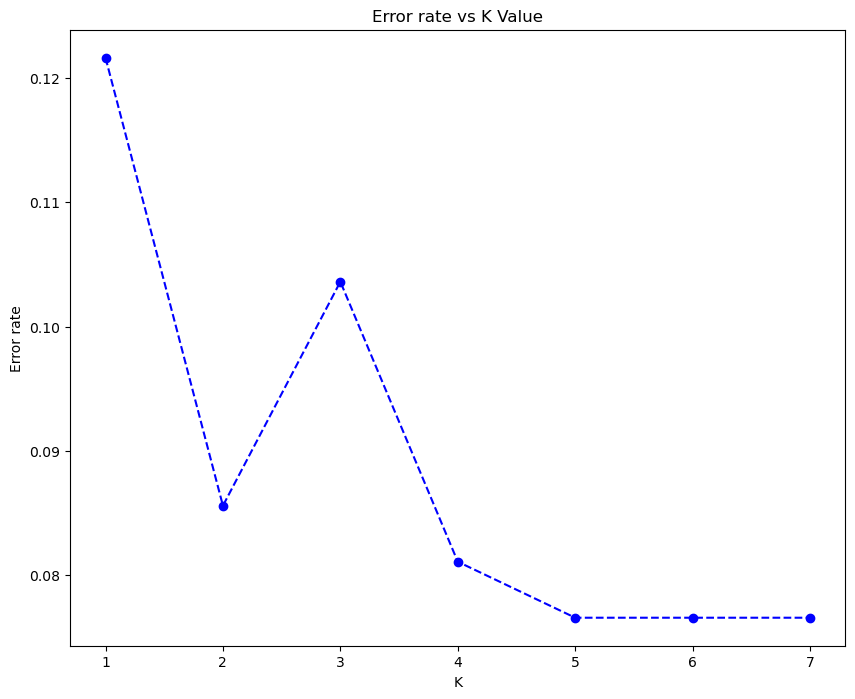

In [67]:
# Optimum K value
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(range (1,8), error_rate, color='blue', linestyle='dashed', marker='o')
plt.title('Error rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [69]:
# learning the classifier
knn=neighbors.KNeighborsClassifier(n_neighbors=4) 
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [71]:
# Model Properties
print(knn.classes_)
print(knn.n_neighbors)


[0 1]
4


In [73]:
# Using the trained model to predict the outcome of the X_Test dataset
y_pred=knn.predict(X_test)

In [75]:
# average : string, [None, ‘binary’ (default), ‘micro’, ‘macro’, ‘weighted’]
# This parameter is required for multiclass/multilabel targets. If None, the scores for each class are returned.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print('precision_score:', precision_score(y_test, y_pred, average='micro'))
print('recall_score:', recall_score(y_test, y_pred, average= 'micro'))
print('f1_score:', f1_score(y_test, y_pred, average= 'micro'))
print('confusion_matrix:', confusion_matrix(y_test, y_pred))
print('classification_report:', classification_report(y_test, y_pred))


Accuracy: 0.918918918918919
precision_score: 0.918918918918919
recall_score: 0.918918918918919
f1_score: 0.918918918918919
confusion_matrix: [[203   1]
 [ 17   1]]
classification_report:               precision    recall  f1-score   support

           0       0.92      1.00      0.96       204
           1       0.50      0.06      0.10        18

    accuracy                           0.92       222
   macro avg       0.71      0.53      0.53       222
weighted avg       0.89      0.92      0.89       222



Interpretation:
The KNN model achieves an overall high performance with an accuracy of 91.9%. The optimal K value is around 5, where the error rate minimizes and stabilizes. 

In [78]:
'''
Task - 2: Grouping Employees with Similar Absenteeism Patterns
Can we identify groups of employees with similar absenteeism patterns based on their absence reasons,
duration, and other relevant factors? Use K-Means clustering to segment customers into groups based on features like demographics, financial attributes, and engagement factors. 
Analyze churn rates within each cluster to identify high-risk segments.
'''

'\nTask - 2: Grouping Employees with Similar Absenteeism Patterns\nCan we identify groups of employees with similar absenteeism patterns based on their absence reasons,\nduration, and other relevant factors? Use K-Means clustering to segment customers into groups based on features like demographics, financial attributes, and engagement factors. \nAnalyze churn rates within each cluster to identify high-risk segments.\n'

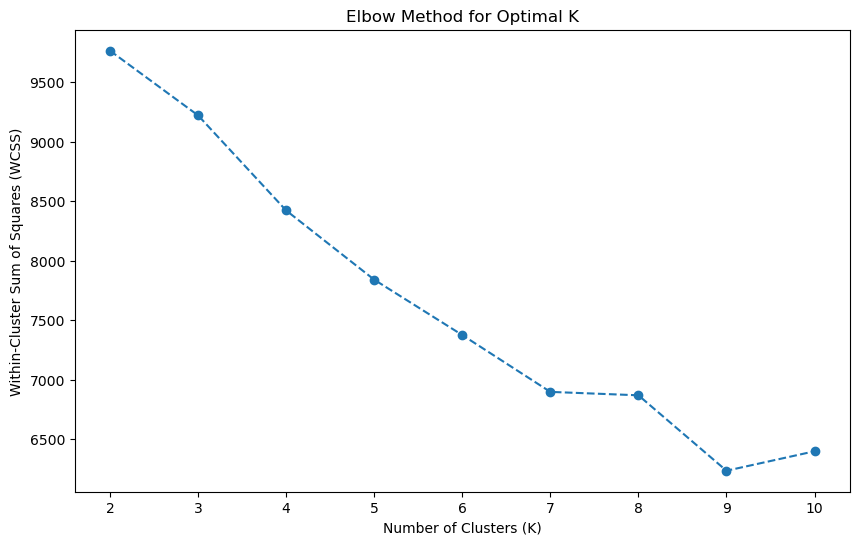

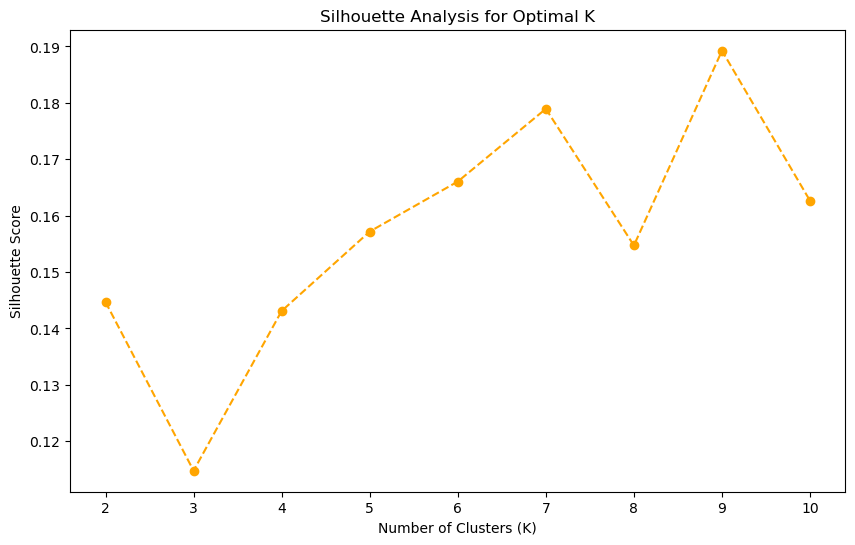

Best K value based on Silhouette Score: 9


In [80]:


wcss = []  
range_clusters = range(2, 11) 

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(range_clusters, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()


silhouette_scores = []

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)


plt.figure(figsize=(10, 6))
plt.plot(range_clusters, silhouette_scores, marker='o', linestyle='--', color='orange')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.show()


best_k_silhouette = range_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"Best K value based on Silhouette Score: {best_k_silhouette}")

For n_clusters = 2 The average silhouette_score is : 0.14539917835161287
For n_clusters = 3 The average silhouette_score is : 0.13901164381512254
For n_clusters = 4 The average silhouette_score is : 0.12959730072126469
For n_clusters = 5 The average silhouette_score is : 0.1431983644698056
For n_clusters = 6 The average silhouette_score is : 0.16382370053697284
For n_clusters = 7 The average silhouette_score is : 0.1663235395537231


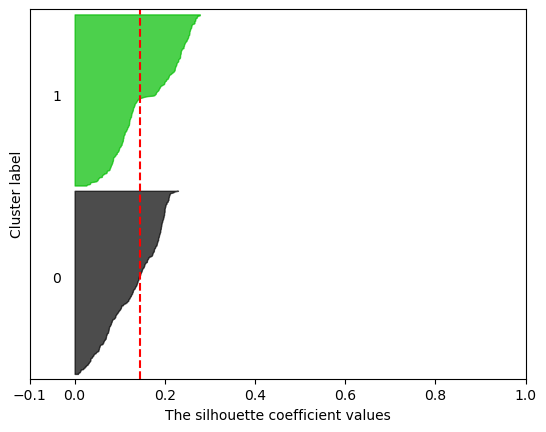

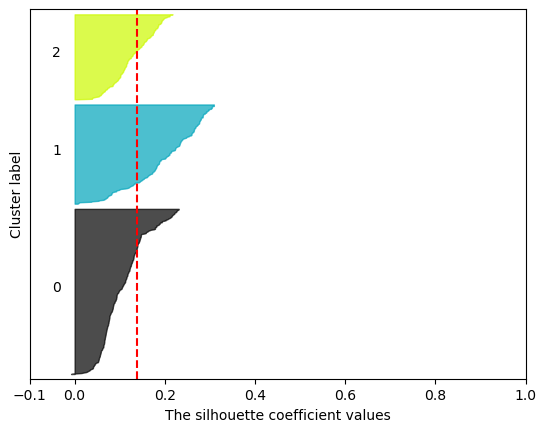

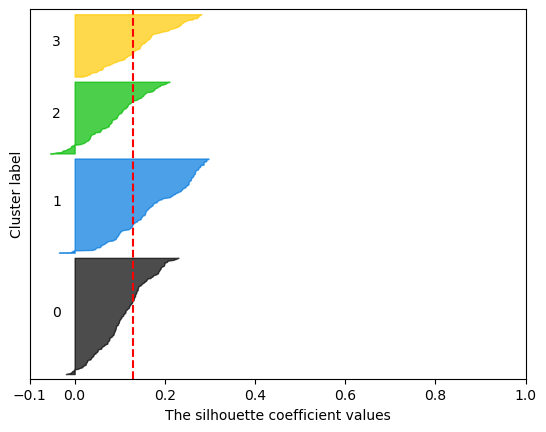

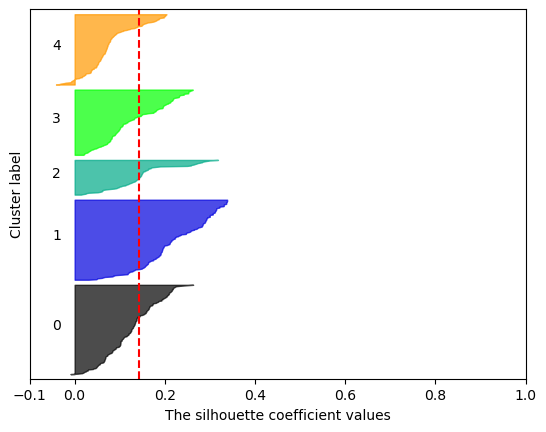

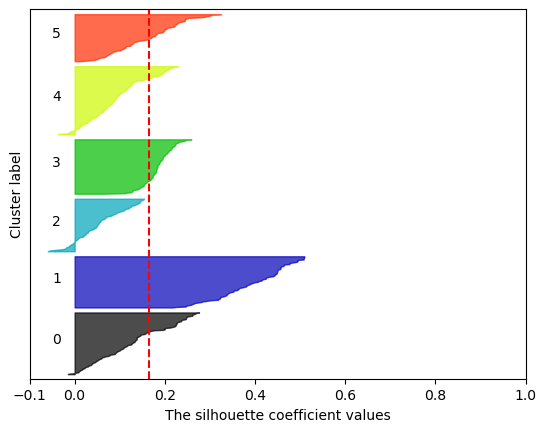

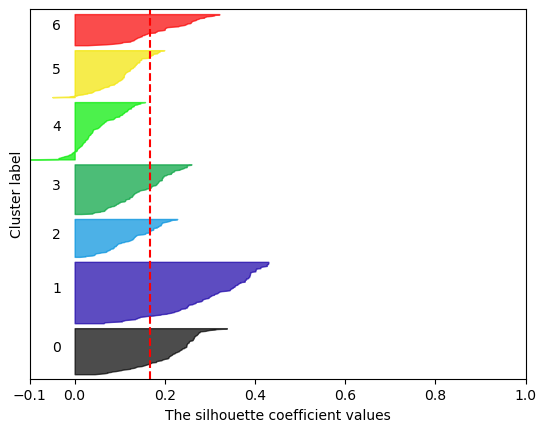

In [82]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

Interpretation:
Elbow Method:

The plot suggests a bend (elbow) around K=6, indicating that six clusters might be the optimal choice for minimizing within-cluster variance without having too many clusters.
Silhouette Analysis:

The silhouette scores peak at K=6 with a score of approximately 0.178, suggesting that six clusters provide the best separation and cohesion of the data points.